In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

%matplotlib inline
warnings.filterwarnings("ignore")

In [2]:
fraud = pd.read_csv(r'Fraud_check.csv')
fraud.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


# EDA

In [3]:
fraud[fraud.duplicated()] # No duplicates

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban


In [4]:
tax_inc=[]

for i in fraud['Taxable.Income']:
    if i<=30000:
        tax_inc.append('Risky')
    else:
        tax_inc.append('Good')
        
fraud['tax_inc']=tax_inc

In [5]:
fraud.drop(columns='Taxable.Income', inplace=True)

In [6]:
fraud.head()

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,tax_inc
0,NO,Single,50047,10,YES,Good
1,YES,Divorced,134075,18,YES,Good
2,NO,Married,160205,30,YES,Good
3,YES,Single,193264,15,YES,Good
4,NO,Married,27533,28,NO,Good


In [7]:
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   City.Population  600 non-null    int64 
 3   Work.Experience  600 non-null    int64 
 4   Urban            600 non-null    object
 5   tax_inc          600 non-null    object
dtypes: int64(2), object(4)
memory usage: 28.2+ KB


In [8]:
fraud.describe()

,City.Population,Work.Experience
count,600.000000,600.000000
mean,108747.368333,15.558333
std,49850.075134,8.842147
min,25779.000000,0.000000
25%,66966.750000,8.000000
50%,106493.500000,15.000000
75%,150114.250000,24.000000
max,199778.000000,30.000000


In [10]:
# Ordinal and label Encoder to convert Categorical data into integers

from sklearn.preprocessing import OrdinalEncoder, LabelEncoder 

In [14]:
x = fraud.iloc[:,:-1]
y = fraud.iloc[:,-1]

In [15]:
# seperating categorical columns

cat_col = x.select_dtypes(object).columns
cat_col

Index(['Undergrad', 'Marital.Status', 'Urban'], dtype='object')

In [19]:
oe = OrdinalEncoder()
x[cat_col]= oe.fit_transform(x[cat_col])

In [20]:
x

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
0,0.0,2.0,50047,10,1.0
1,1.0,0.0,134075,18,1.0
2,0.0,1.0,160205,30,1.0
3,1.0,2.0,193264,15,1.0
4,0.0,1.0,27533,28,0.0
...,...,...,...,...,...
595,1.0,0.0,39492,7,1.0
596,1.0,0.0,55369,2,1.0
597,0.0,0.0,154058,0,1.0
598,1.0,1.0,180083,17,0.0


In [36]:
# convert target column

le = LabelEncoder()
y= le.fit_transform(y)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,

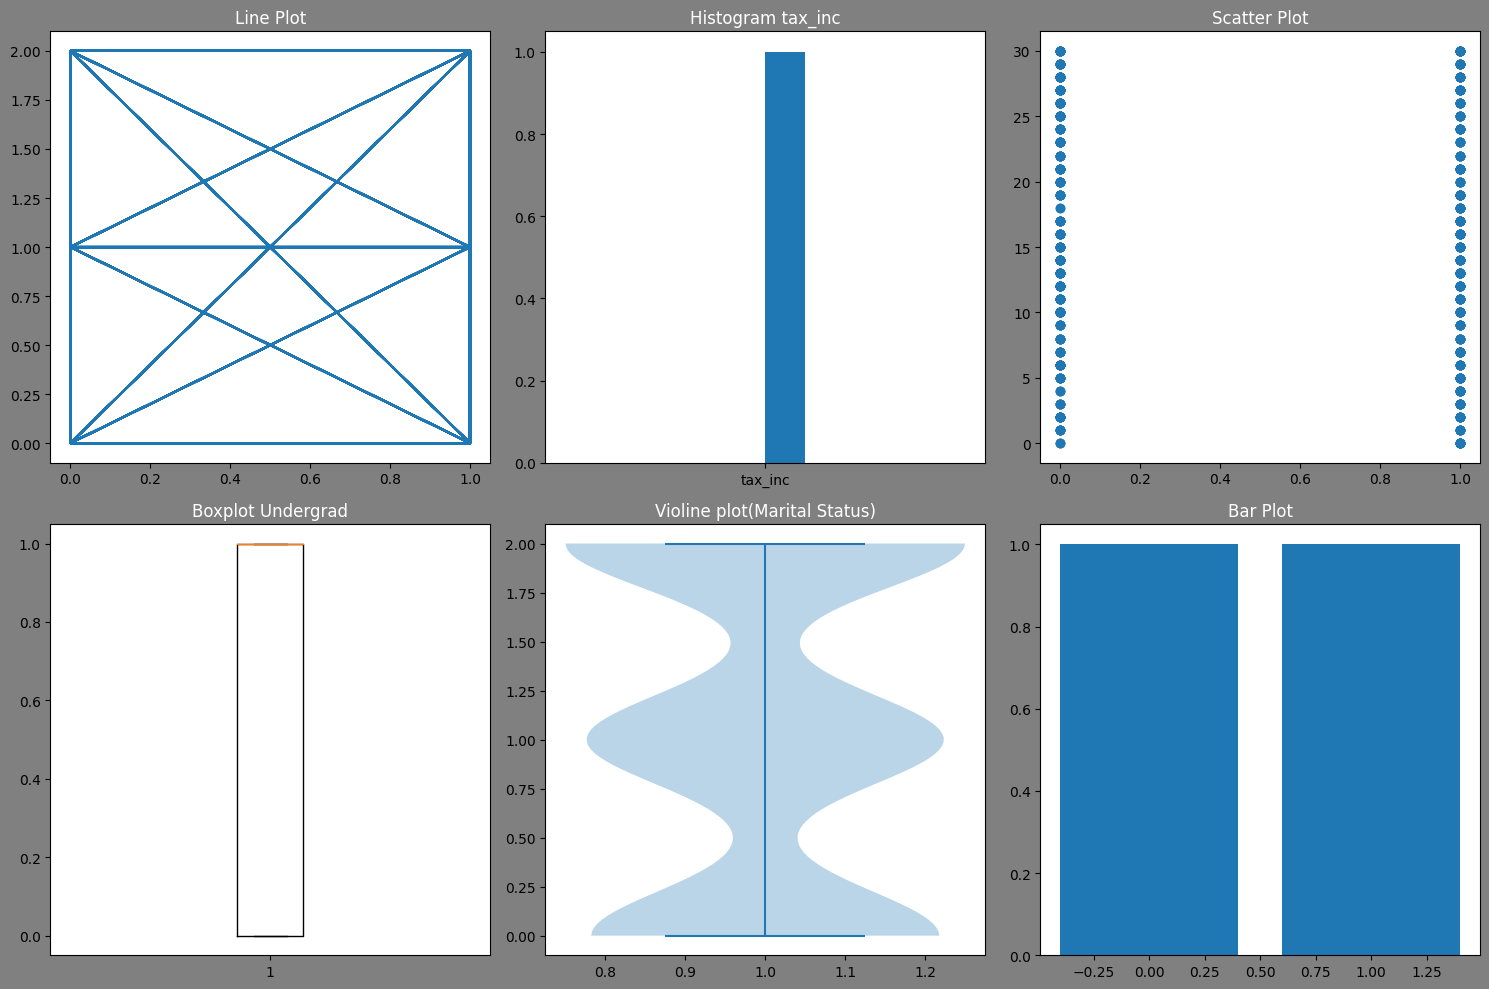

In [55]:
plt.figure(figsize=(15,10), facecolor='grey')

[plt.subplot(2,3,1), plt.plot('Undergrad', 'Marital.Status', data=x), plt.title('Line Plot', color='white')],
[plt.subplot(2,3,2), plt.hist('tax_inc', data=y), plt.title('Histogram tax_inc', color='white')],
[plt.subplot(2,3,3), plt.scatter('Urban', 'Work.Experience', data=x), plt.title("Scatter Plot", color='white')],
[plt.subplot(2,3,4), plt.boxplot('Undergrad', data=x), plt.title("Boxplot Undergrad", color='white')],
[plt.subplot(2,3,5), plt.violinplot('Marital.Status', data=x), plt.title('Violine plot(Marital Status)', color='white')],
[plt.subplot(2,3,6), plt.bar('Urban','Undergrad', data=x), plt.title('Bar Plot', color='white')]
plt.tight_layout()
plt.show()

# Decision Tree Building

In [57]:
from sklearn.model_selection import train_test_split

In [58]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.20, random_state=40)

In [59]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

In [61]:
model = DecisionTreeClassifier(criterion='entropy', max_depth=3)
model.fit(xtrain,ytrain)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [66]:
pred = model.predict(xtest)

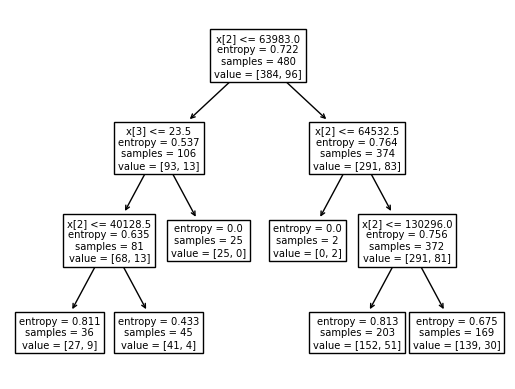

In [63]:
tree.plot_tree(model)
plt.show()

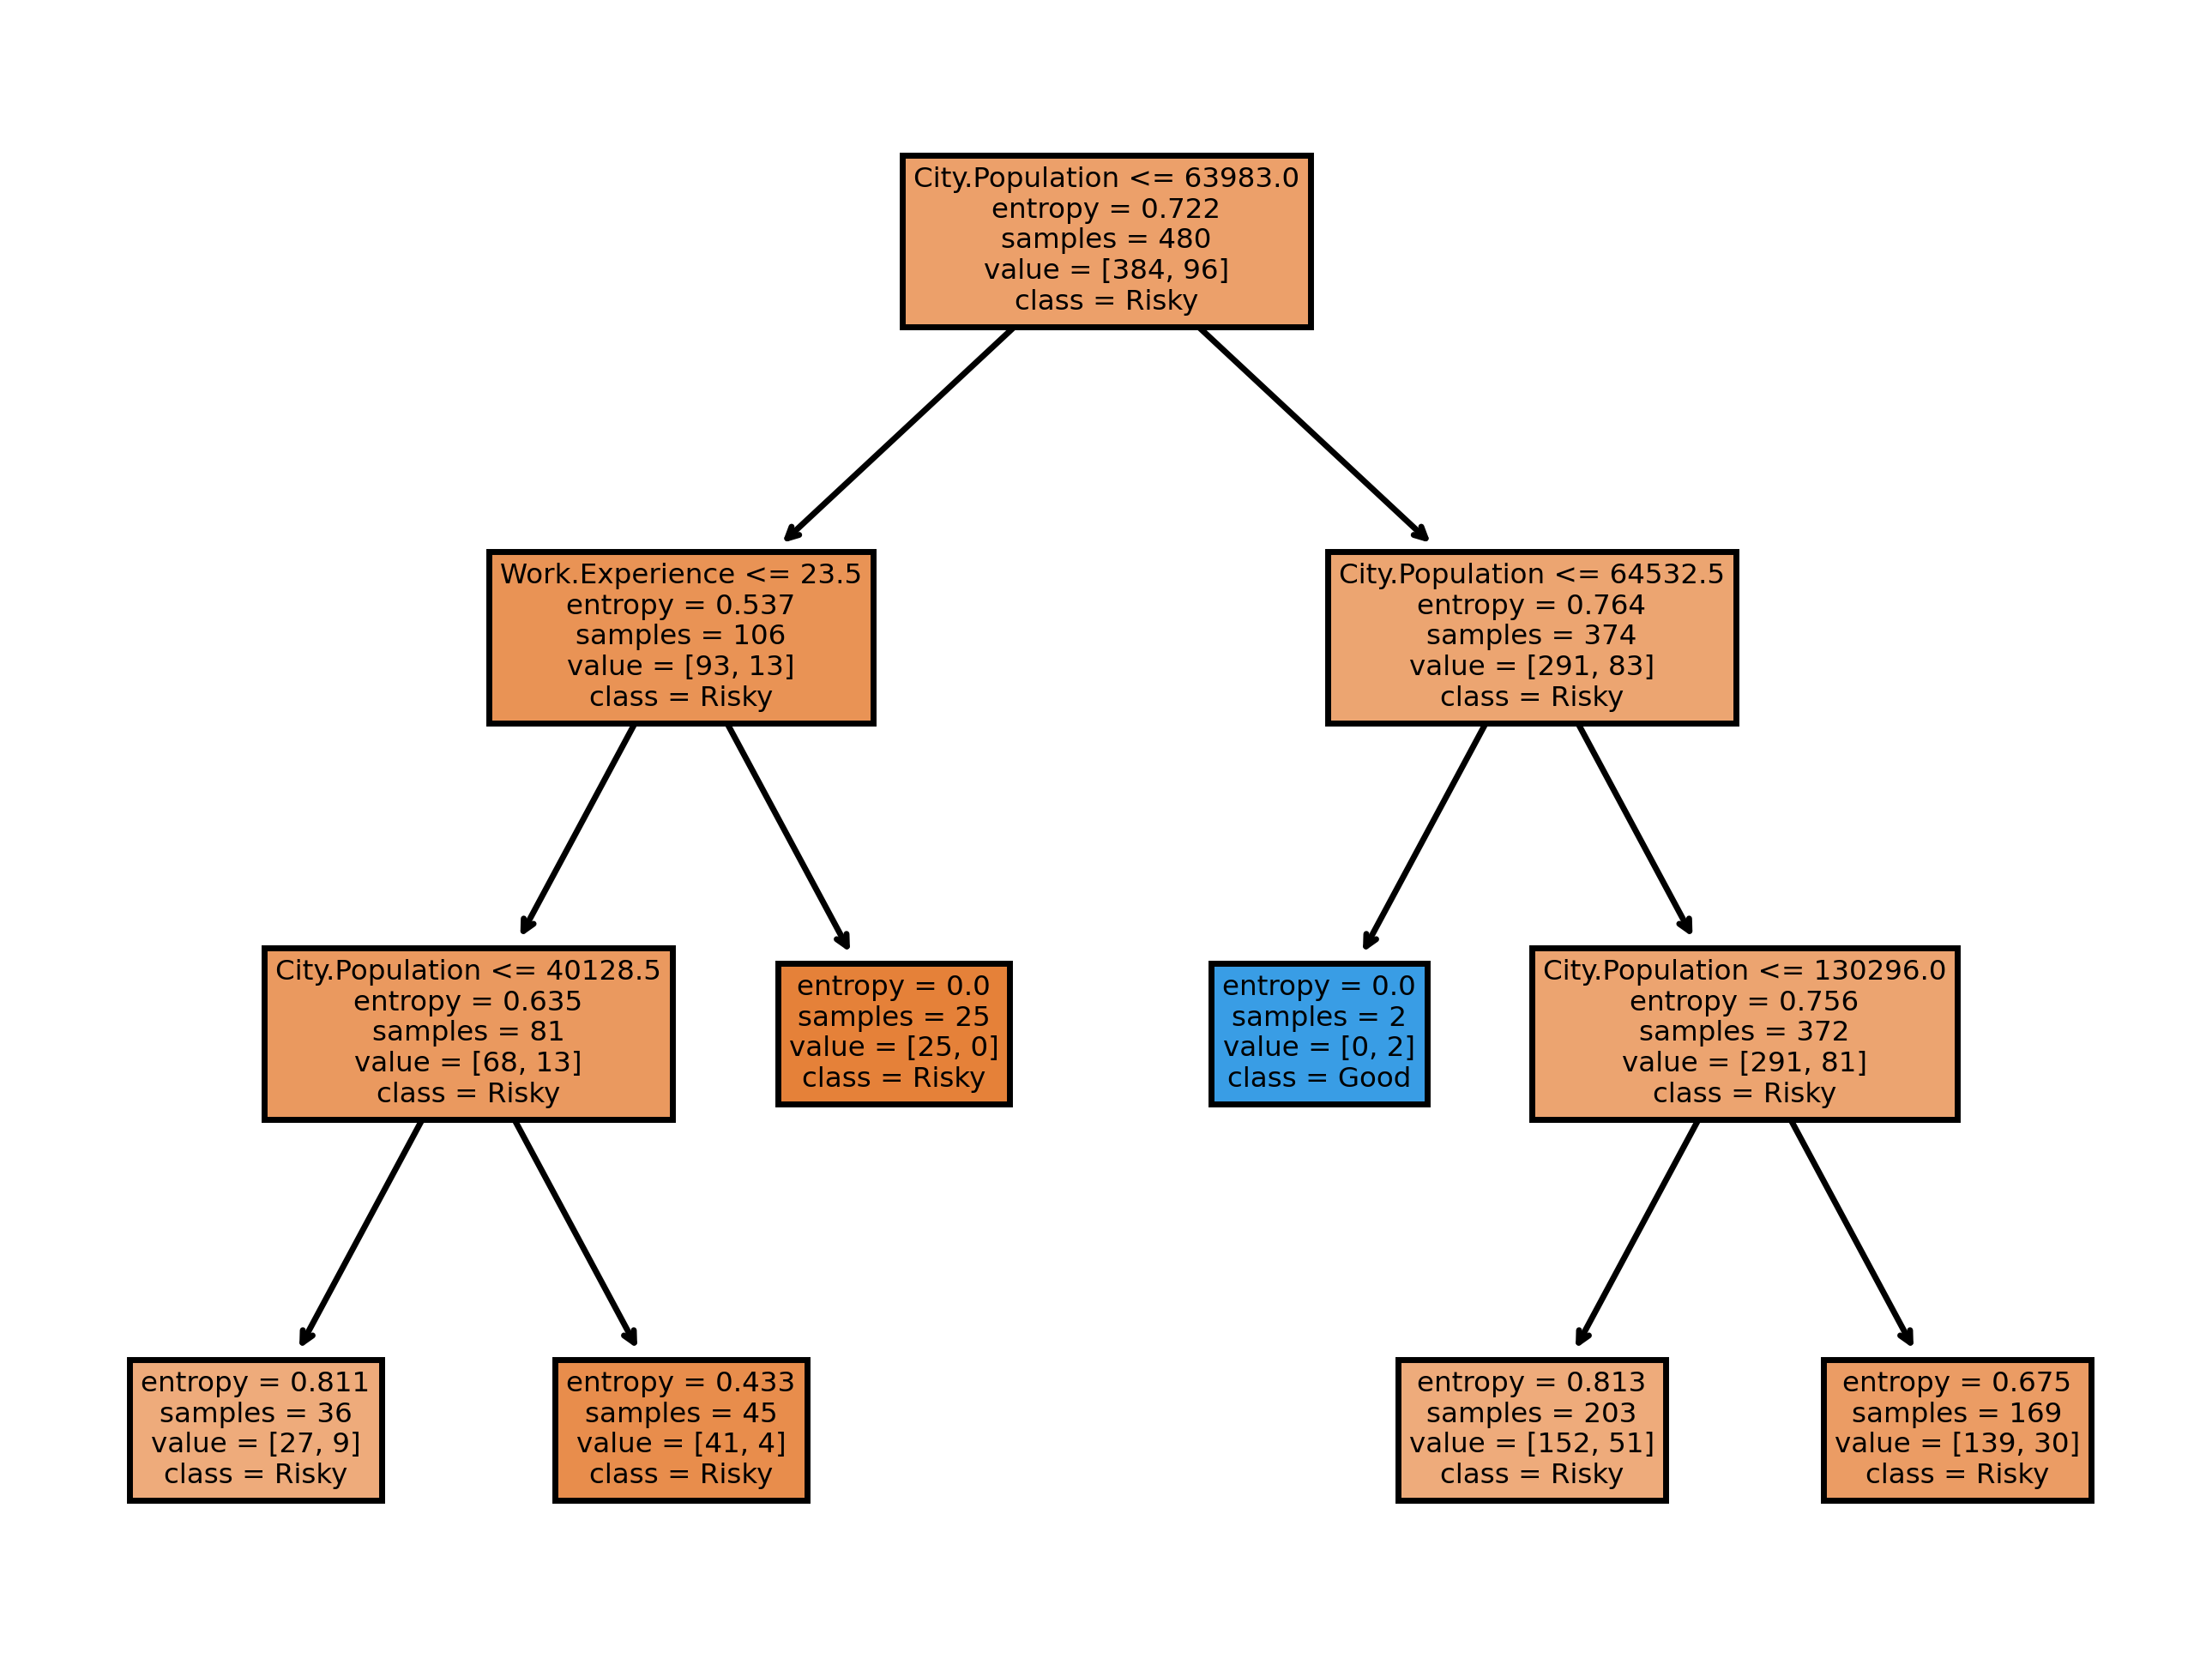

In [65]:
plt.figure(dpi=500)
fn = x.columns
cn= ['Risky', 'Good']
tree.plot_tree(model, feature_names=fn, class_names=cn, filled=True)
plt.show()

In [69]:
pd.Series(pred).value_counts()

0    120
dtype: int64

In [70]:
pd.crosstab(ytest, pred)

col_0,0
row_0,
0,92
1,28


In [85]:
# Accuracy

from sklearn.metrics import accuracy_score, confusion_matrix



In [72]:
np.mean(pred == ytest), accuracy_score(ytest, pred)

(0.7666666666666667, 0.7666666666666667)

# Decision Tree Gini 

In [80]:
gini_model = DecisionTreeClassifier(criterion = 'gini', max_depth=3)
gini_model.fit(xtrain,ytrain)

DecisionTreeClassifier(max_depth=3)

In [81]:
ypred = gini_model.predict(xtest)

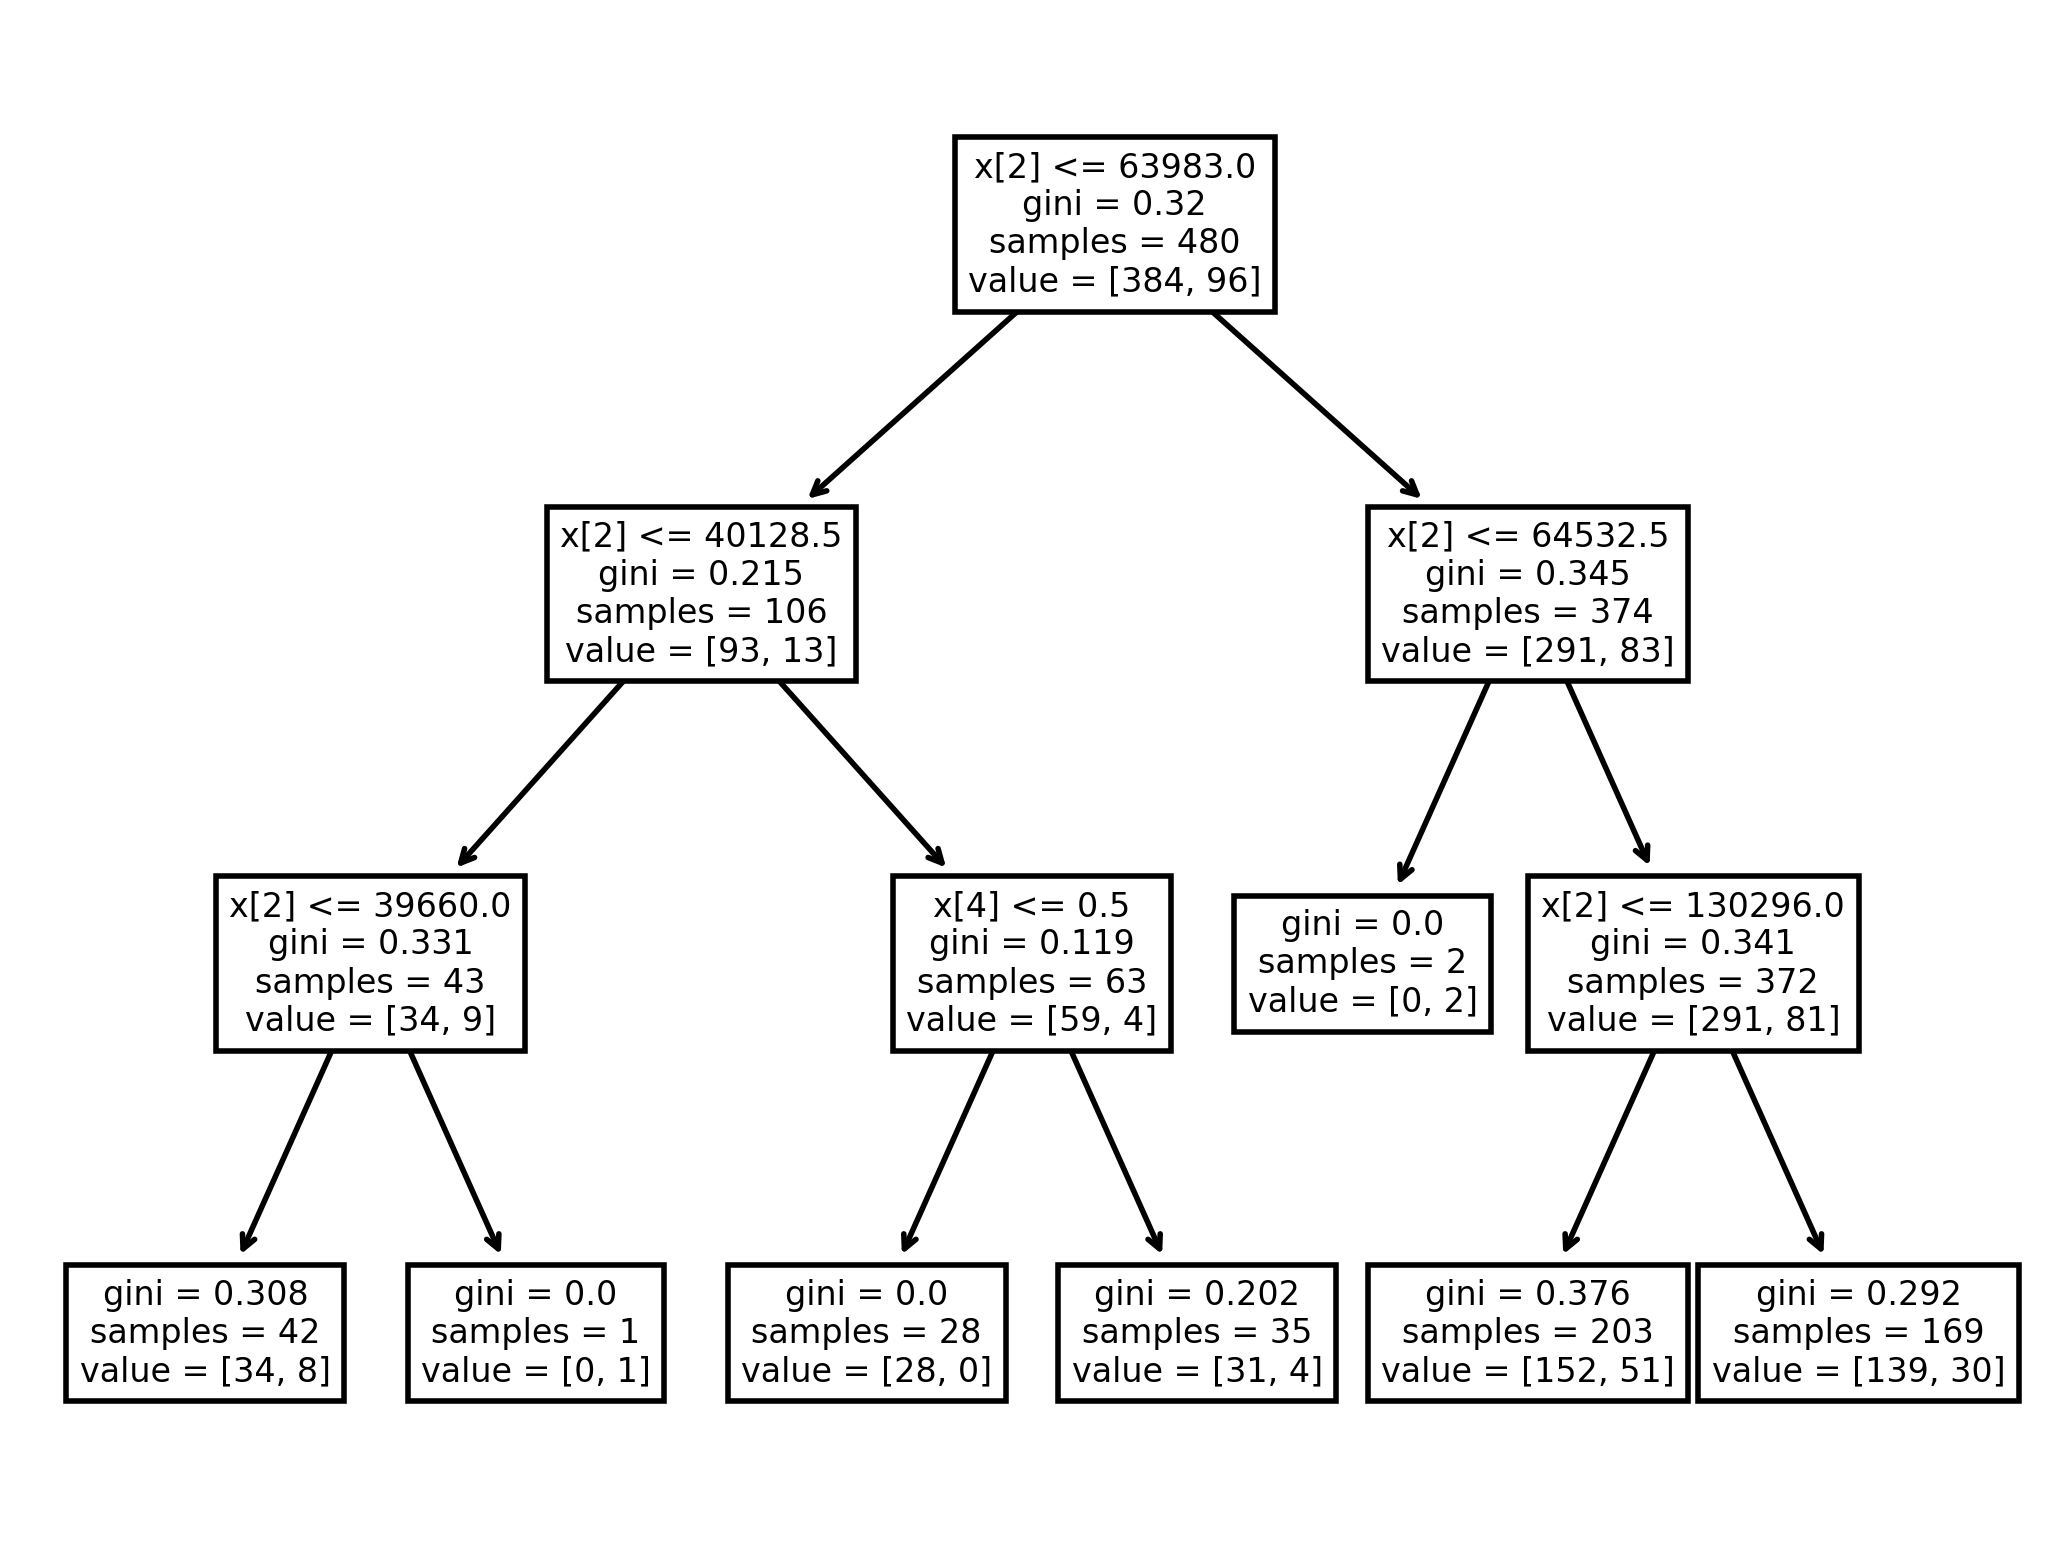

In [82]:
plt.figure(dpi=400)
tree.plot_tree(gini_model)
plt.show()

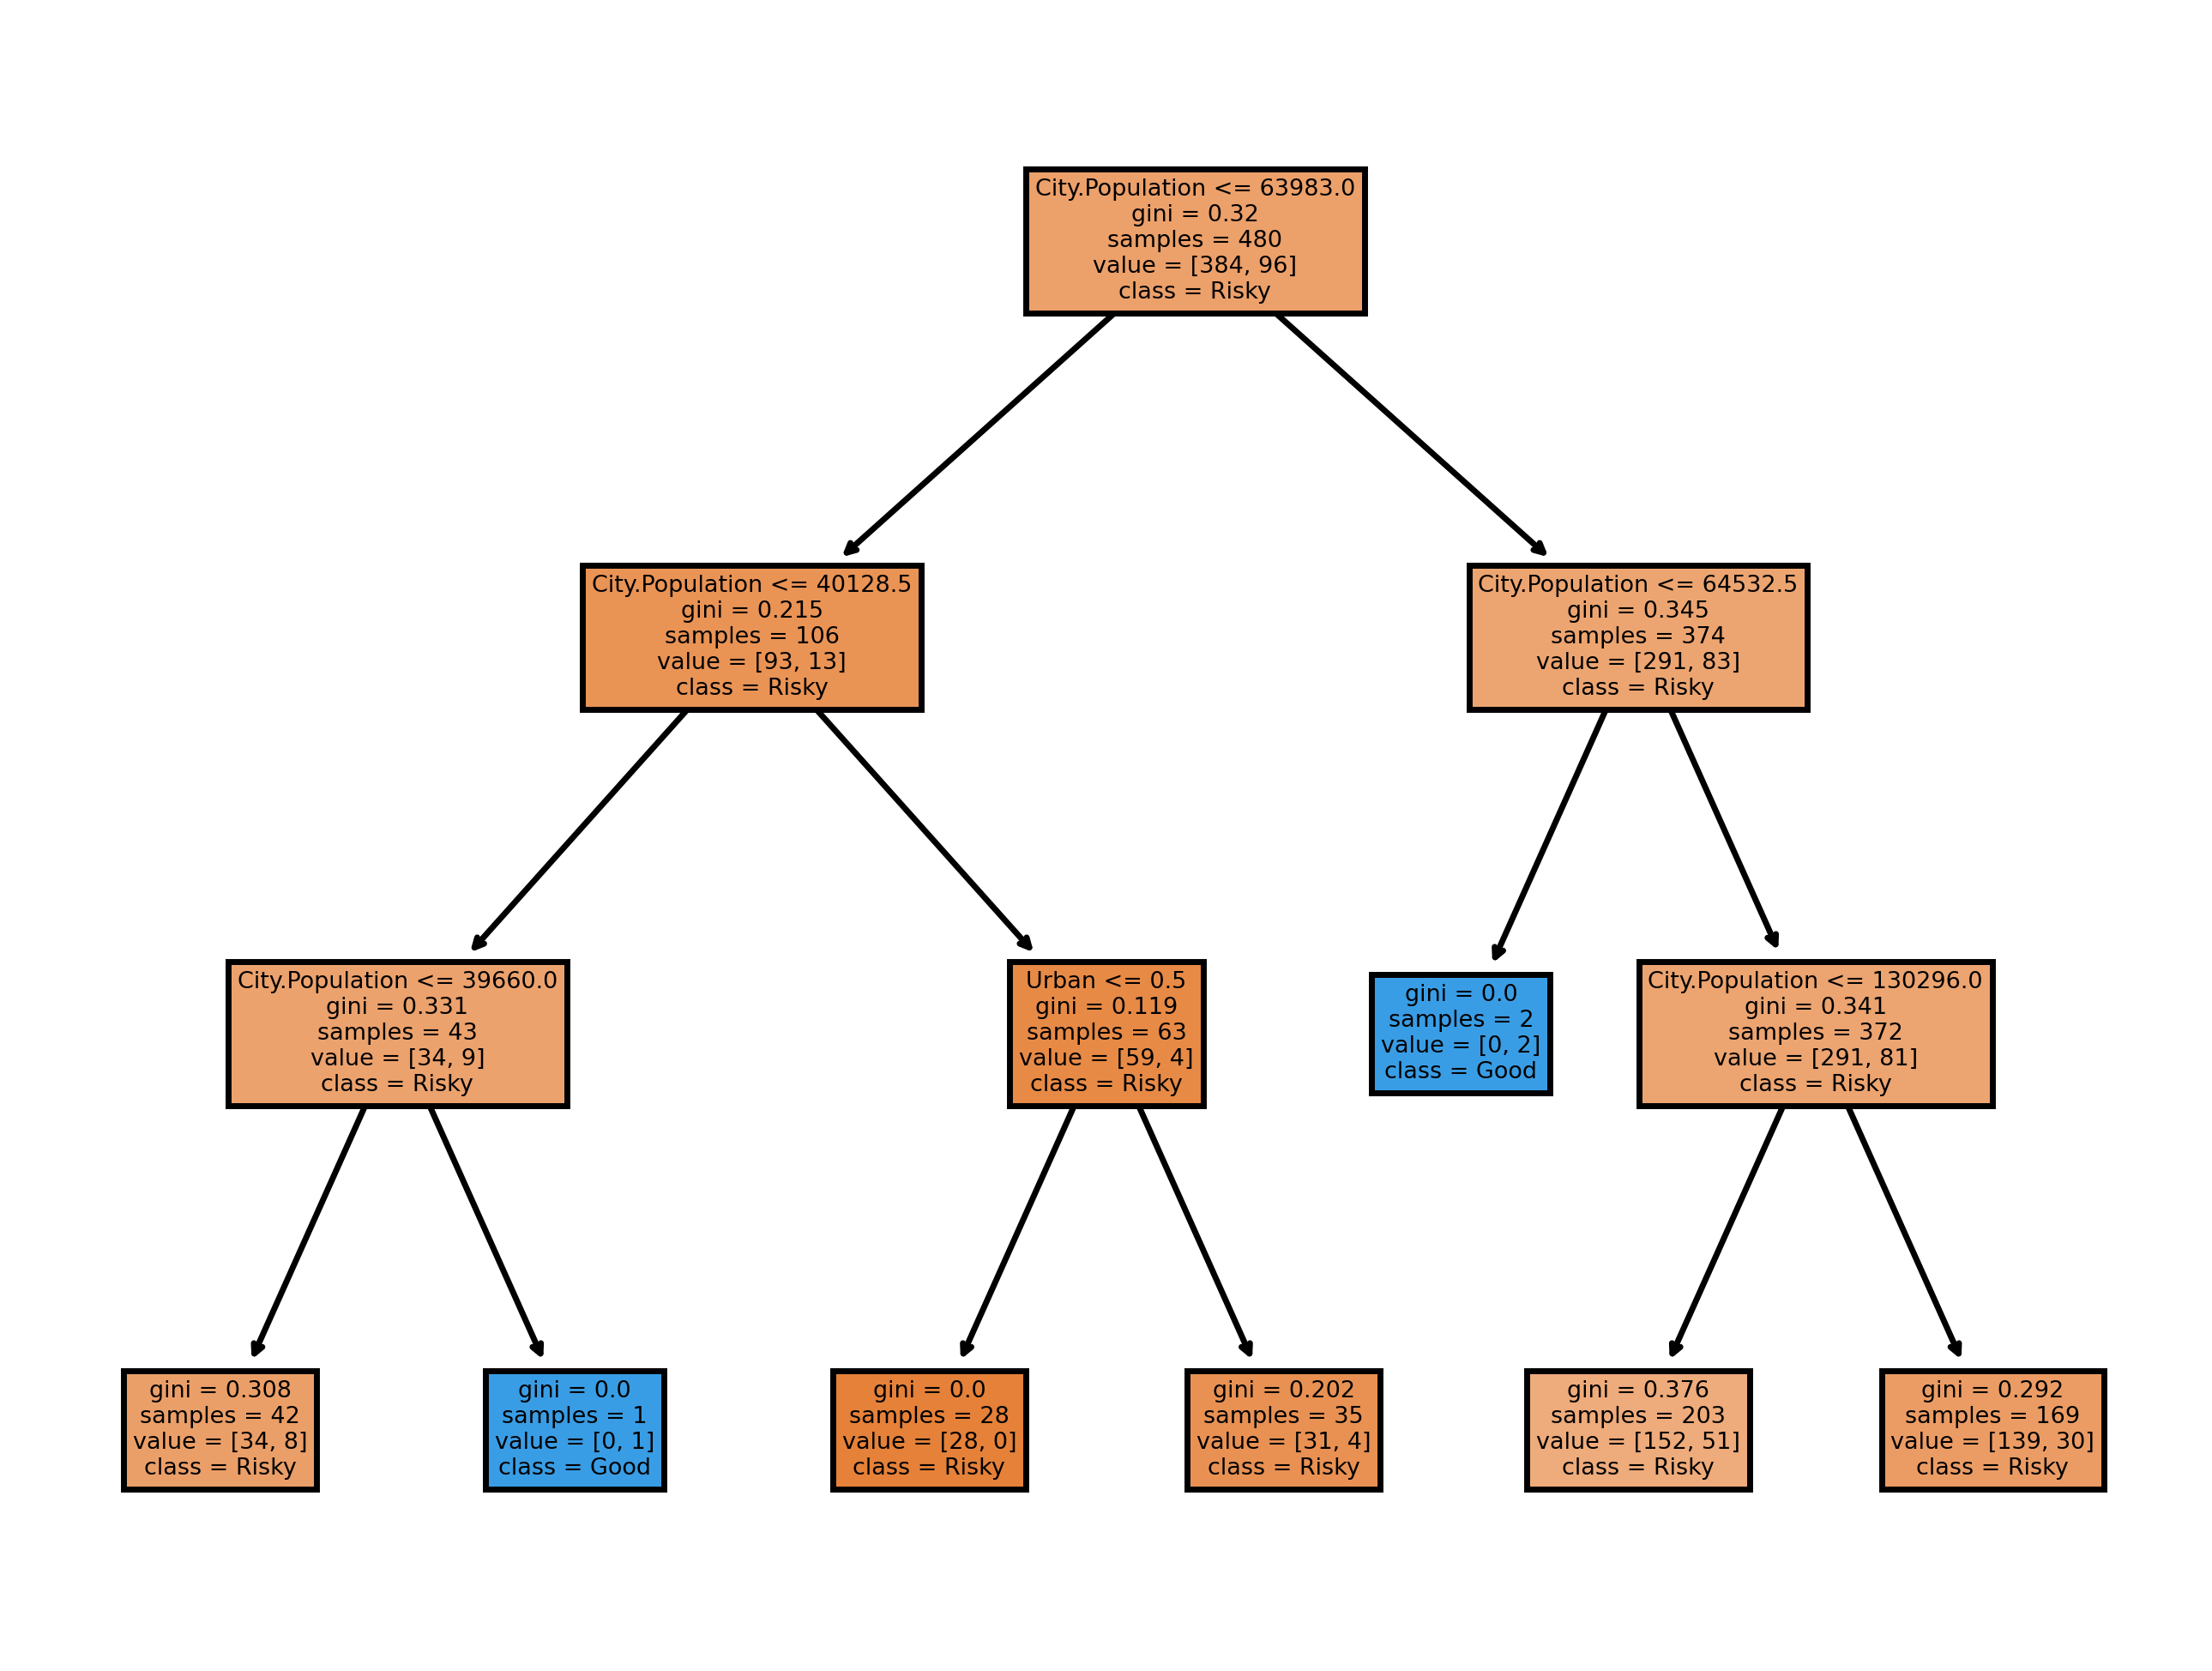

In [83]:
plt.figure(dpi=500)
fn = x.columns
cn= ['Risky', 'Good']
tree.plot_tree(gini_model, feature_names=fn, class_names=cn, filled=True)
plt.show()

In [84]:
np.mean(ypred == ytest)

0.7583333333333333

In [86]:
print(confusion_matrix(ytest, ypred))

[[91  1]
 [28  0]]


In [87]:
((91+0)/(91+1+28+0))

0.7583333333333333